In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from predict import mydynamo

In [3]:
for i in range(2001,2020) : 
    print(i)
obs = pd.read_csv('countries.csv')
obs

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


id           created_at           updated_at  code  \
0      1  2021-01-06 05:28:44  2021-01-06 05:28:44     4   
1      2  2021-01-06 05:28:45  2021-01-06 05:28:45     8   
2      3  2021-01-06 05:28:45  2021-01-06 05:28:45    12   
3      4  2021-01-06 05:28:45  2021-01-06 05:28:45    16   
4      5  2021-01-06 05:28:45  2021-01-06 05:28:45    20   
..   ...                  ...                  ...   ...   
217  218  2021-01-06 05:29:04  2021-01-06 05:29:04   876   
218  219  2021-01-06 05:29:04  2021-01-06 05:29:04   732   
219  220  2021-01-06 05:29:05  2021-01-06 05:29:05   887   
220  221  2021-01-06 05:29:05  2021-01-06 05:29:05   894   
221  222  2021-01-06 05:29:05  2021-01-06 05:29:05   716   

                          name iso_code           iso_name  parentCode  \
0                  Afghanistan       AF        Afghanistan          13   
1                      Albania       AL            Albania           6   
2                      Algeria       DZ            Algeria          11   
3               American Samoa       AS     American Samoa          12   
4                      Andorra       AD            Andorra           4   
..                         ...      ...                ...         ...   
217  Wallis and Futuna Islands       WF  Wallis and Futuna          12   
218             Western Sahara       EH     Western Sahara          11   
219                      Yemen       YE              Yemen           9   
220                     Zambia       ZM             Zambia          14   
221                   Zimbabwe       ZW           Zimbabwe          14   

                     parentName  
0                    South Asia  
1    East Europe & Central Asia  
2               Northern Africa  
3                       Pacific  
4              EU & West Europe  
..                          ...  
217                     Pacific  
218             Northern Africa  
219                 Middle East  
220             Southern Africa  
221             Southern Africa  

[222 rows x 9 columns]

In [52]:
X = pd.read_csv('data/export-hs4-pivot.csv')
X_dict = {}
obs_dict = {}

for i in range(2011,2020,4) :
    # X_new = X
    X_new = X.loc[X['year_at'] == i]
    X_new = X_new.drop(['year_at'], axis=1)
    X_new = X_new.set_index(['exporter'])    
    
    obs = pd.read_csv('countries.csv')
    obs['year_at'] = i
    obs_new = obs.set_index(['name'])    
    
    [X_new, obs_new] = mydynamo.removeOutlierObservationExtra(X_new, obs_new)
    X_dict[str(i)] = X_new
    obs_dict[str(i)] = obs_new
#     break
    
X_new = mydynamo.concatDataFrameExtra(X_dict)
obs = mydynamo.concatDataFrameExtra(obs_dict)


In [53]:
X_new

0101  0102  0103  0104    0105    0106   0201  \
     exporter                                                                   
2011 Afghanistan                 0.0   0.0   0.0   0.0     0.0     0.0    0.0   
     Albania                     0.0   0.0   0.0   0.0     0.0   997.0    0.0   
     Algeria                     0.0   0.0   0.0   0.0     0.0     0.0    0.0   
     American Samoa              0.0   0.0   0.0   0.0     0.0     0.0    0.0   
     Andorra                    62.0   0.0   0.0   6.0     0.0     0.0   88.0   
...                              ...   ...   ...   ...     ...     ...    ...   
2019 Wallis and Futuna Islands   0.0   0.0   0.0   0.0     0.0     0.0    0.0   
     Western Sahara              0.0   0.0   0.0   0.0     0.0     0.0    0.0   
     Yemen                       0.0   0.0   0.0   0.0     0.0     0.0    0.0   
     Zambia                     18.0  30.0   8.0   1.0  7349.0   142.0  157.0   
     Zimbabwe                   24.0  64.0   0.0   0.0  1722.0  1240.0    0.0   

                                 0202   0203   0204  0205   0206     0207  \
     exporter                                                               
2011 Afghanistan                  0.0    0.0    0.0   0.0    0.0      0.0   
     Albania                      0.0    0.0    0.0   0.0  741.0      0.0   
     Algeria                      0.0    0.0    0.0   0.0    0.0    320.0   
     American Samoa               0.0    0.0    0.0   0.0    0.0      0.0   
     Andorra                    191.0    0.0    0.0  37.0    2.0      0.0   
...                               ...    ...    ...   ...    ...      ...   
2019 Wallis and Futuna Islands    0.0    0.0    0.0   0.0    0.0      0.0   
     Western Sahara               0.0    0.0    0.0   0.0    0.0      0.0   
     Yemen                        0.0    0.0    0.0   0.0    0.0      0.0   
     Zambia                     175.0  152.0    1.0   0.0  771.0  13112.0   
     Zimbabwe                     0.0  211.0  203.0   0.0  775.0      0.0   

                                  0208  0209  0210   0301     0302     0303  \
     exporter                                                                 
2011 Afghanistan                   0.0   0.0   0.0    0.0      0.0      0.0   
     Albania                    1150.0   0.0   0.0    0.0   1540.0    136.0   
     Algeria                       0.0   0.0   0.0    1.0    263.0      8.0   
     American Samoa                0.0   0.0   0.0    0.0      0.0      0.0   
     Andorra                       0.0   0.0  51.0    0.0      0.0      0.0   
...                                ...   ...   ...    ...      ...      ...   
2019 Wallis and Futuna Islands     0.0   0.0   0.0    0.0      0.0      0.0   
     Western Sahara                0.0   0.0   0.0    0.0      0.0     61.0   
     Yemen                         0.0   0.0   0.0   40.0  59011.0  36728.0   
     Zambia                       94.0   0.0   5.0    4.0     55.0   3383.0   
     Zimbabwe                    720.0   0.0   0.0  293.0      0.0   5865.0   

                                  0304    0305    0306     0307     0308  \
     exporter                                                              
2011 Afghanistan                   0.0     0.0     0.0      0.0      0.0   
     Albania                      13.0  2242.0   782.0   5448.0      0.0   
     Algeria                       0.0     0.0  4046.0   2244.0      0.0   
     American Samoa                0.0     0.0     0.0      0.0      0.0   
     Andorra                       0.0    19.0     1.0      0.0      0.0   
...                                ...     ...     ...      ...      ...   
2019 Wallis and Futuna Islands     0.0     0.0     0.0      0.0      0.0   
     Western Sahara                0.0     0.0     0.0      0.0      0.0   
     Yemen                      1746.0  4102.0  6953.0  25266.0  10842.0   
     Zambia                       67.0   385.0     0.0      0.0      1.0   
     Zimbabwe                    371

In [54]:
obs

id           created_at           updated_at  \
     name                                                                       
2011 Afghanistan                  1  2021-01-06 05:28:44  2021-01-06 05:28:44   
     Albania                      2  2021-01-06 05:28:45  2021-01-06 05:28:45   
     Algeria                      3  2021-01-06 05:28:45  2021-01-06 05:28:45   
     American Samoa               4  2021-01-06 05:28:45  2021-01-06 05:28:45   
     Andorra                      5  2021-01-06 05:28:45  2021-01-06 05:28:45   
...                             ...                  ...                  ...   
2019 Wallis and Futuna Islands  218  2021-01-06 05:29:04  2021-01-06 05:29:04   
     Western Sahara             219  2021-01-06 05:29:04  2021-01-06 05:29:04   
     Yemen                      220  2021-01-06 05:29:05  2021-01-06 05:29:05   
     Zambia                     221  2021-01-06 05:29:05  2021-01-06 05:29:05   
     Zimbabwe                   222  2021-01-06 05:29:05  2021-01-06 05:29:05   

                                code iso_code           iso_name  parentCode  \
     name                                                                      
2011 Afghanistan                   4       AF        Afghanistan          13   
     Albania                       8       AL            Albania           6   
     Algeria                      12       DZ            Algeria          11   
     American Samoa               16       AS     American Samoa          12   
     Andorra                      20       AD            Andorra           4   
...                              ...      ...                ...         ...   
2019 Wallis and Futuna Islands   876       WF  Wallis and Futuna          12   
     Western Sahara              732       EH     Western Sahara          11   
     Yemen                       887       YE              Yemen           9   
     Zambia                      894       ZM             Zambia          14   
     Zimbabwe                    716       ZW           Zimbabwe          14   

                                                parentName  year_at  
     name                                                            
2011 Afghanistan                                South Asia     2011  
     Albania                    East Europe & Central Asia     2011  
     Algeria                               Northern Africa     2011  
     American Samoa                                Pacific     2011  
     Andorra                              EU & West Europe     2011  
...                                                    ...      ...  
2019 Wallis and Futuna Islands                     Pacific     2019  
     Western Sahara                        Northern Africa     2019  
     Yemen                                     Middle East     2019  
     Zambia                                Southern Africa     2019  
     Zimbabwe                              Southern Africa     2019  

[657 rows x 9 columns]

In [55]:
var = pd.DataFrame(np.array(X.columns)[2:], columns=['hscode'])
var = var.set_index('hscode')
var

Empty DataFrame
Columns: []
Index: [0101, 0102, 0103, 0104, 0105, 0106, 0201, 0202, 0203, 0204, 0205, 0206, 0207, 0208, 0209, 0210, 0301, 0302, 0303, 0304, 0305, 0306, 0307, 0308, 0401, 0402, 0403, 0404, 0405, 0406, 0407, 0408, 0409, 0410, 0501, 0502, 0503, 0504, 0505, 0506, 0507, 0508, 0509, 0510, 0511, 0601, 0602, 0603, 0604, 0701, 0702, 0703, 0704, 0705, 0706, 0707, 0708, 0709, 0710, 0711, 0712, 0713, 0714, 0801, 0802, 0803, 0804, 0805, 0806, 0807, 0808, 0809, 0810, 0811, 0812, 0813, 0814, 0901, 0902, 0903, 0904, 0905, 0906, 0907, 0908, 0909, 0910, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1101, 1102, 1103, 1104, 1105, ...]

[1258 rows x 0 columns]

In [56]:
mydynamo.config()

package anndata colorcet       cvxopt dynamo-release hdbscan loompy  \
version   0.7.5    2.0.2  1.2.5.post1         0.95.2  0.8.26  3.0.6   

package matplotlib   numba numdifftools   numpy pandas pynndescent  \
version      3.3.3  0.52.0       0.9.39  1.19.3  1.2.0       0.5.1   

package python-igraph scikit-learn  scipy seaborn setuptools statsmodels  \
version         0.8.3       0.24.0  1.6.0  0.11.1     49.2.1      0.12.1   

package    tqdm      trimap umap-learn  
version  4.56.0  1.4.3.dev1      0.4.6

In [57]:
adata = mydynamo.createAnnotationData(X_new, X_new, obs, var, False)
adata

AnnData object with n_obs × n_vars = 657 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'year_at'
    layers: 'spliced', 'unspliced'

In [58]:
mydynamo.dynamoProcess(adata)

AnnData expects .obs.index to contain strings, but your first indices are: Index([('2011', 'Afghanistan'), ('2011', 'Albania')], dtype='object'), …
AnnData expects .obs.index to contain strings, but your first indices are: Index([('2011', 'Afghanistan'), ('2011', 'Albania')], dtype='object'), …
calculating transition matrix via pearson kernel with sqrt transform.: 100%|█| 
projecting velocity vector to low dimensional embedding...: 100%|█| 657/657 [00


AnnData object with n_obs × n_vars = 657 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'year_at', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_tra

In [59]:
adata.obsm['velocity_umap'] = adata.obsm['velocity_umap']*0
adata.obsm['velocity_umap']

array([[ 0.,  0.],
       [ 0.,  0.],
       [-0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0., -0.],
       [ 0., -0.]])

In [60]:
adata.obs

id           created_at  \
(2011, Afghanistan)                  1  2021-01-06 05:28:44   
(2011, Albania)                      2  2021-01-06 05:28:45   
(2011, Algeria)                      3  2021-01-06 05:28:45   
(2011, American Samoa)               4  2021-01-06 05:28:45   
(2011, Andorra)                      5  2021-01-06 05:28:45   
...                                ...                  ...   
(2019, Wallis and Futuna Islands)  218  2021-01-06 05:29:04   
(2019, Western Sahara)             219  2021-01-06 05:29:04   
(2019, Yemen)                      220  2021-01-06 05:29:05   
(2019, Zambia)                     221  2021-01-06 05:29:05   
(2019, Zimbabwe)                   222  2021-01-06 05:29:05   

                                            updated_at  code iso_code  \
(2011, Afghanistan)                2021-01-06 05:28:44     4       AF   
(2011, Albania)                    2021-01-06 05:28:45     8       AL   
(2011, Algeria)                    2021-01-06 05:28:45    12       DZ   
(2011, American Samoa)             2021-01-06 05:28:45    16       AS   
(2011, Andorra)                    2021-01-06 05:28:45    20       AD   
...                                                ...   ...      ...   
(2019, Wallis and Futuna Islands)  2021-01-06 05:29:04   876       WF   
(2019, Western Sahara)             2021-01-06 05:29:04   732       EH   
(2019, Yemen)                      2021-01-06 05:29:05   887       YE   
(2019, Zambia)                     2021-01-06 05:29:05   894       ZM   
(2019, Zimbabwe)                   2021-01-06 05:29:05   716       ZW   

                                            iso_name  parentCode  \
(2011, Afghanistan)                      Afghanistan          13   
(2011, Albania)                              Albania           6   
(2011, Algeria)                              Algeria          11   
(2011, American Samoa)                American Samoa          12   
(2011, Andorra)                              Andorra           4   
...                                              ...         ...   
(2019, Wallis and Futuna Islands)  Wallis and Futuna          12   
(2019, Western Sahara)                Western Sahara          11   
(2019, Yemen)                                  Yemen           9   
(2019, Zambia)                                Zambia          14   
(2019, Zimbabwe)                            Zimbabwe          14   

                                                   parentName  year_at  \
(2011, Afghanistan)                                South Asia     2011   
(2011, Albania)                    East Europe & Central Asia     2011   
(2011, Algeria)                               Northern Africa     2011   
(2011, American Samoa)                                Pacific     2011   
(2011, Andorra)                              EU & West Europe     2011   
...                                                       ...      ...   
(2019, Wallis and Futuna Islands)                     Pacific     2019   
(2019, Western Sahara)                        Northern Africa     2019   
(2019, Yemen)                                     Middle East     2019   
(2019, Zambia)                                Southern Africa     2019   
(2019, Zimbabwe)                              Southern Africa     2019   

                                   nGenes     nCounts  pMito  use_for_pca  \
(2011, Afghanistan)                    35    341150.0    0.0         True   
(2011, Albania)                       634   1948200.0    0.0         True   
(2011, Algeria)                       314  73436312.0    0.0         True   
(2011, American Samoa)                  4      1157.0    0.0        False   
(2011, Andorra)                       418    113983.0    0.0         True   
...                                   ...         ...    ...          ...   
(2019, Wallis and Futuna Islands)      47      2043.0    0.0         True   
(2019, Western Sahara)                 44      3280.0    0.0         True   
(20

<Figure size 1200x800 with 0 Axes>

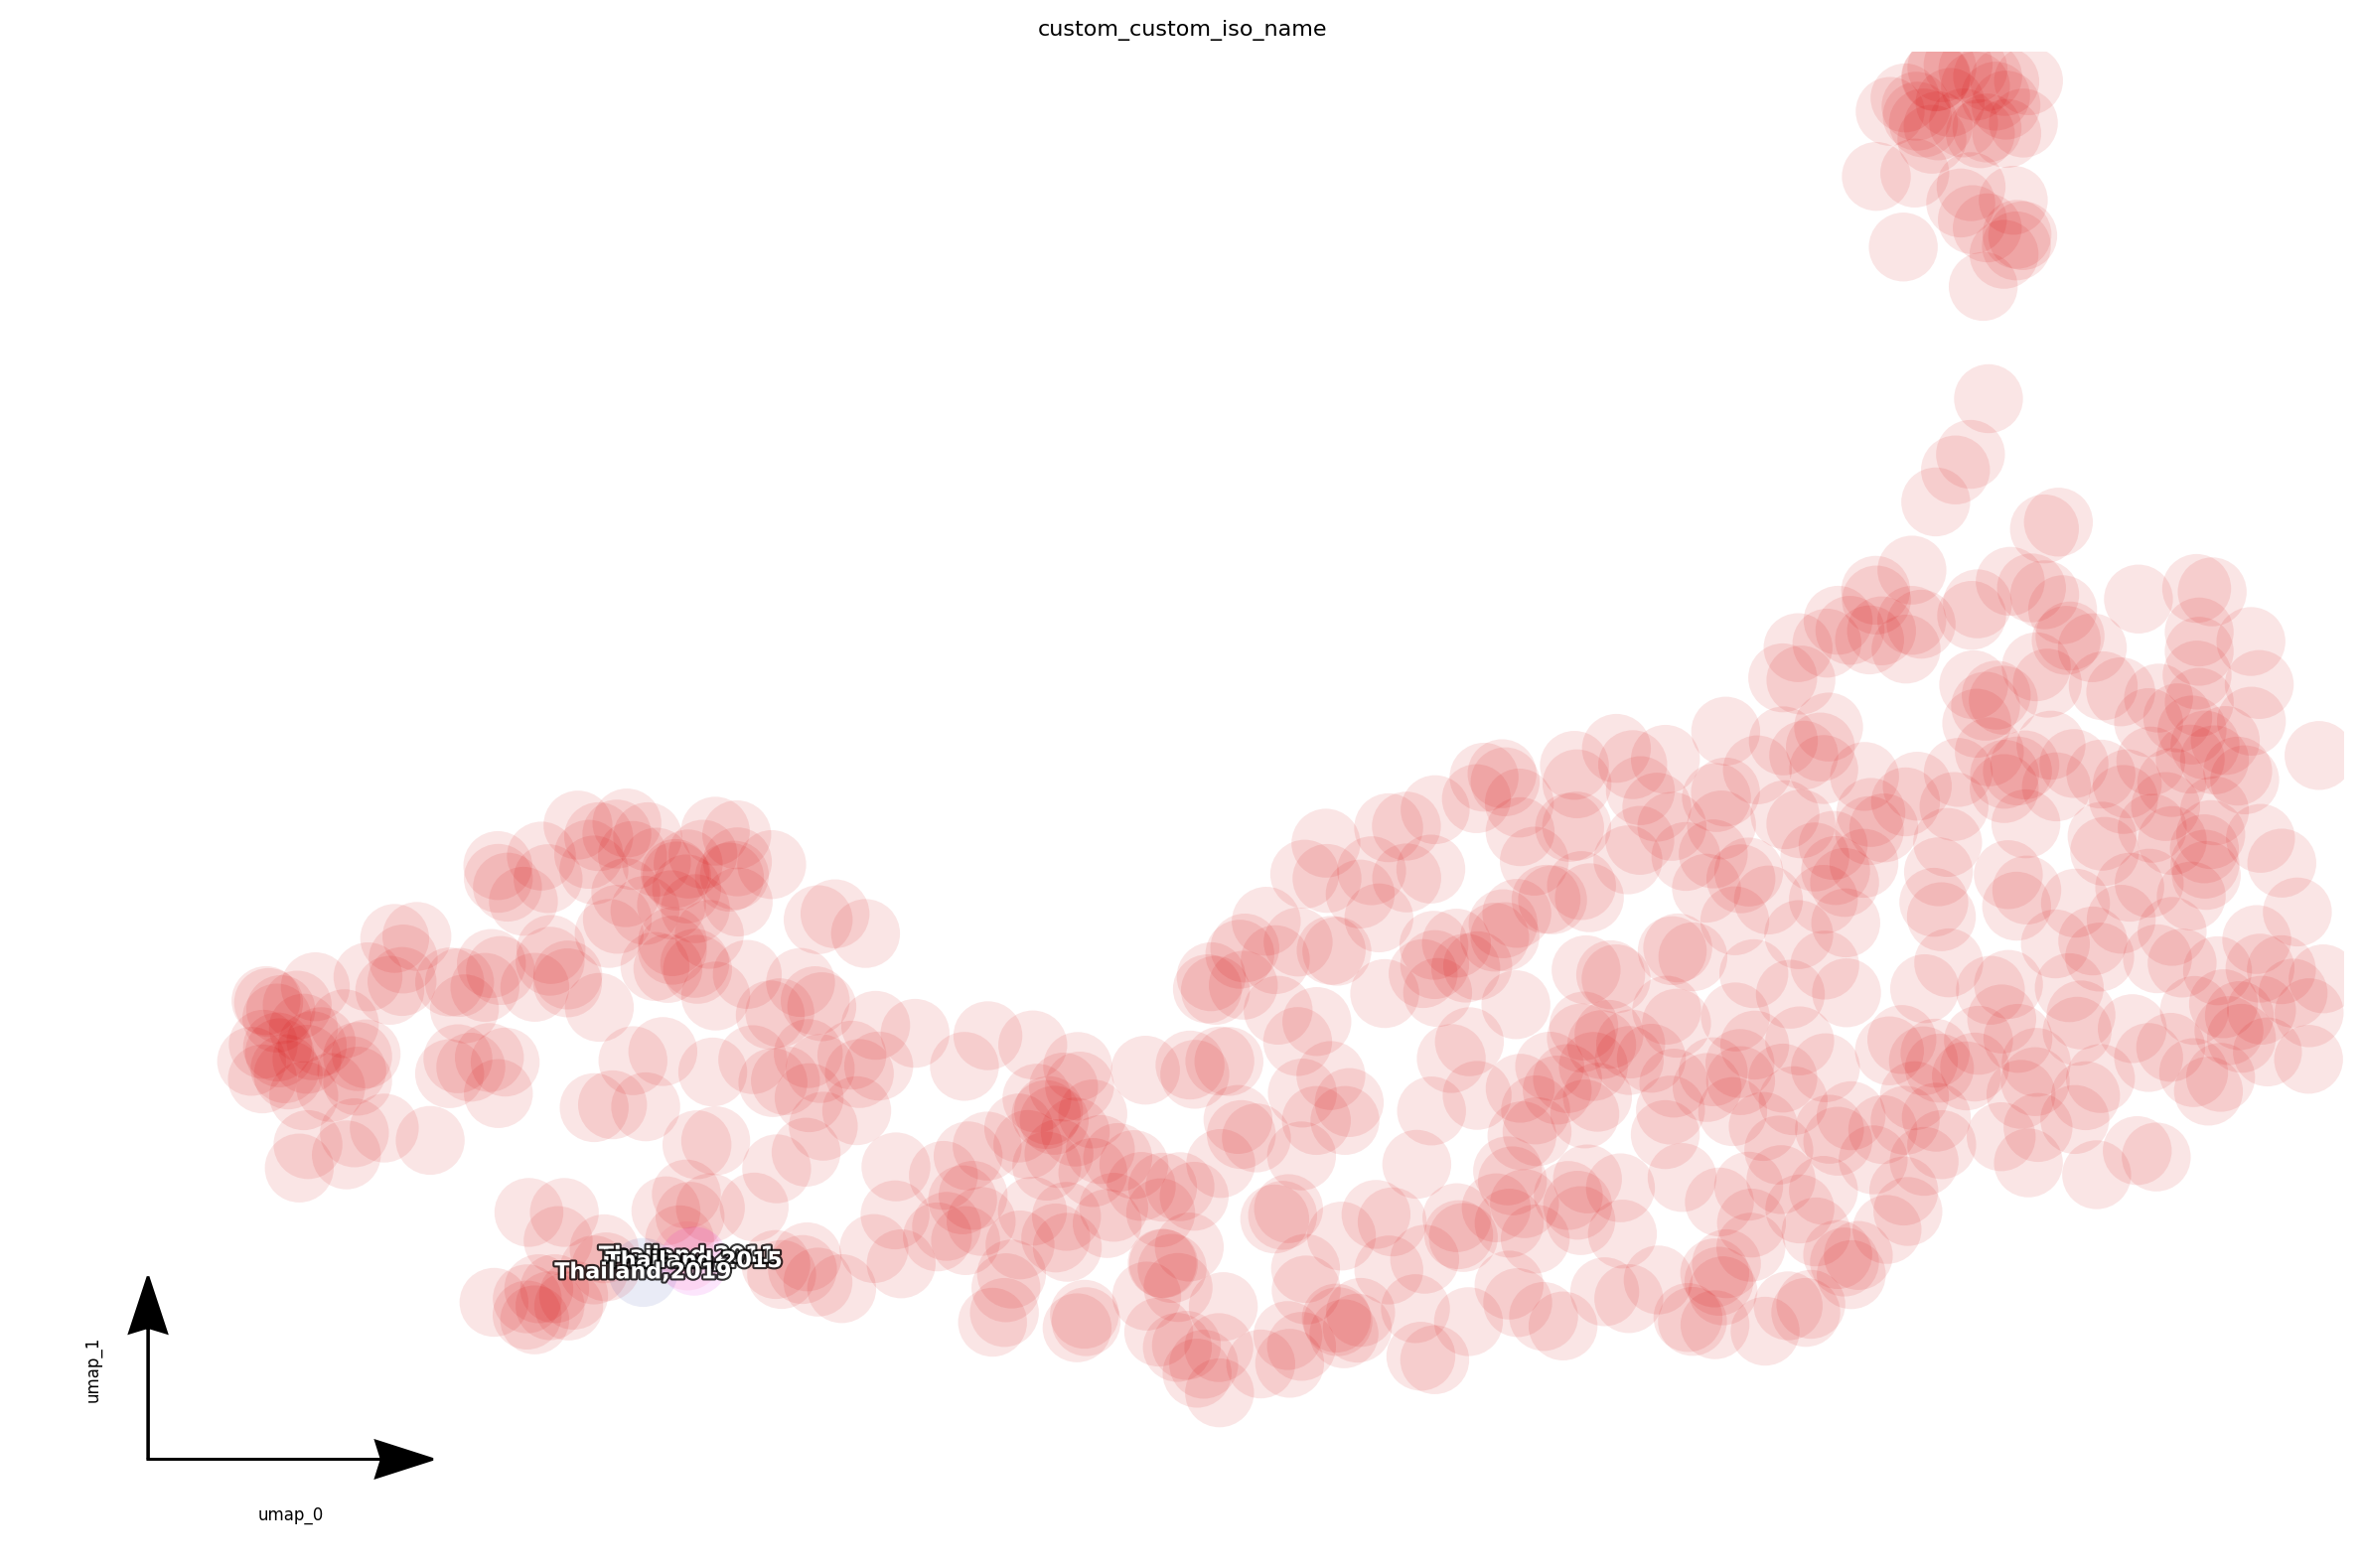

In [61]:
adata.obs['custom_iso_name'] = adata.obs.apply(lambda x: x['iso_name']+","+str(x['year_at']), axis=1)
mydynamo.dynamoLargePlot(adata,'custom_iso_name', 'iso_name',["Thailand"])

<Figure size 1200x800 with 0 Axes>

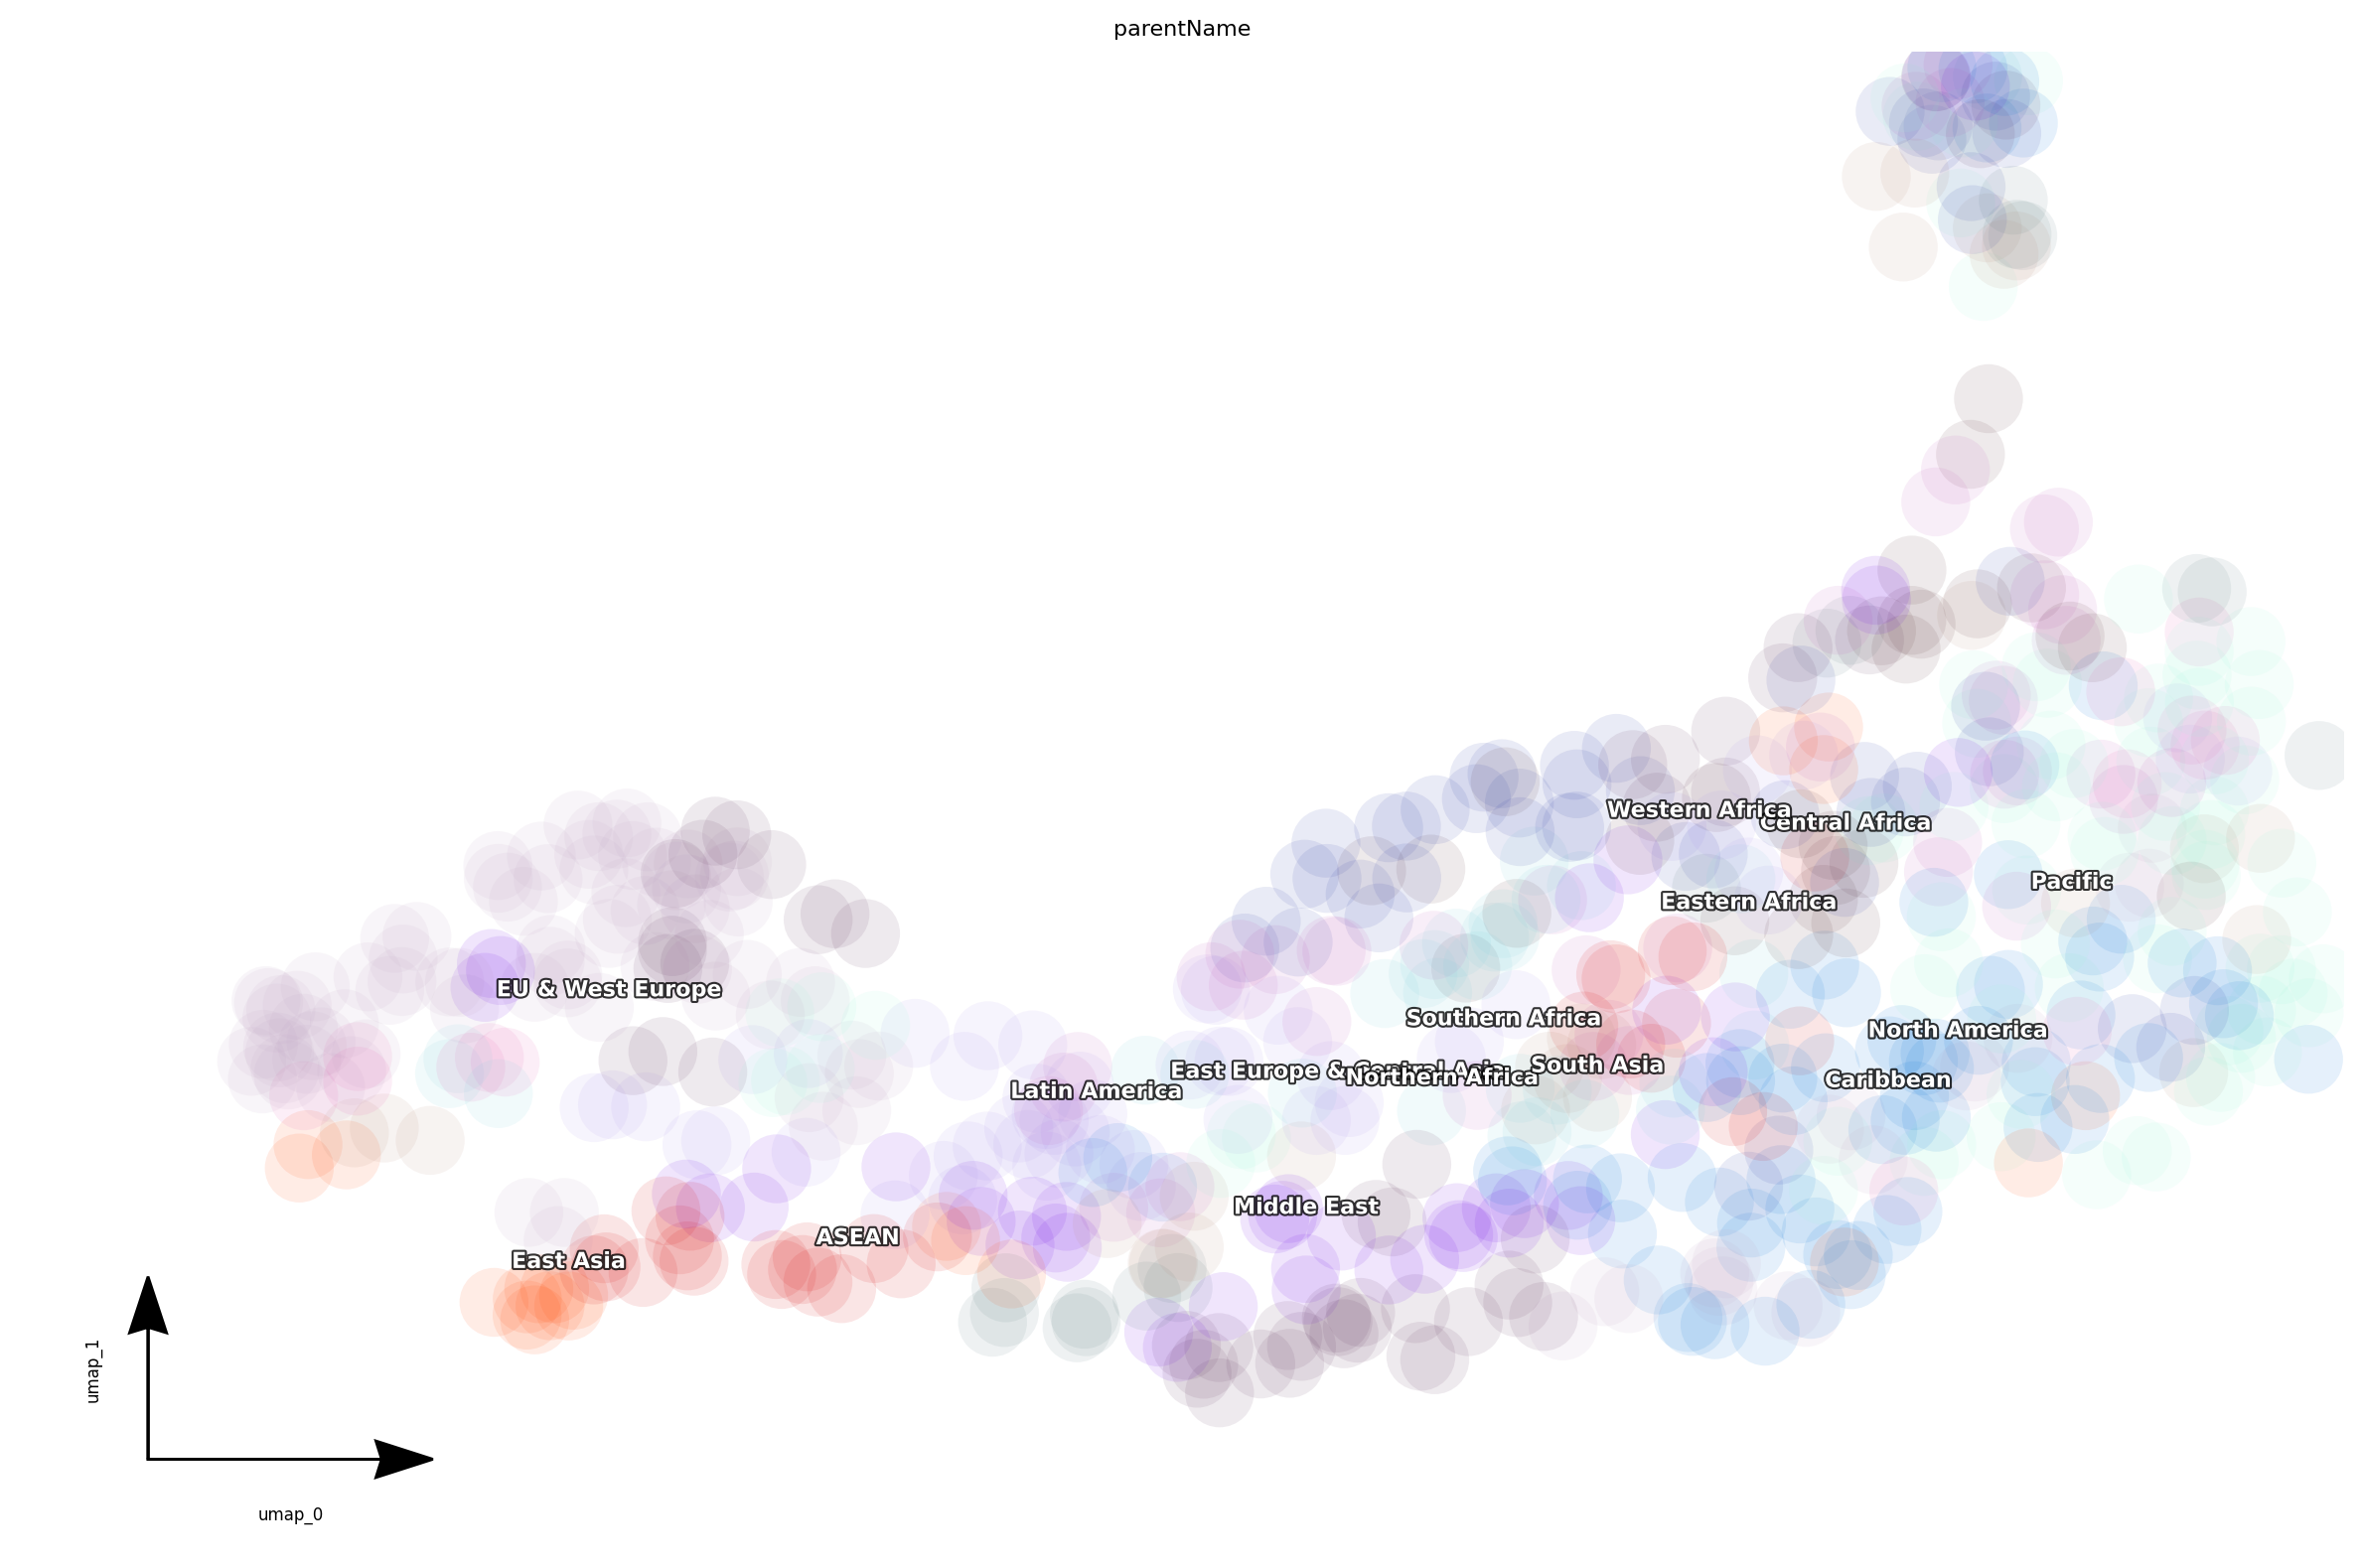

In [64]:
# adata.obs['custom_iso_name'] = adata.obs.apply(lambda x: x['iso_name']+","+str(x['year_at']), axis=1)
mydynamo.dynamoLargePlot(adata,'parentName')

<Figure size 1200x800 with 0 Axes>

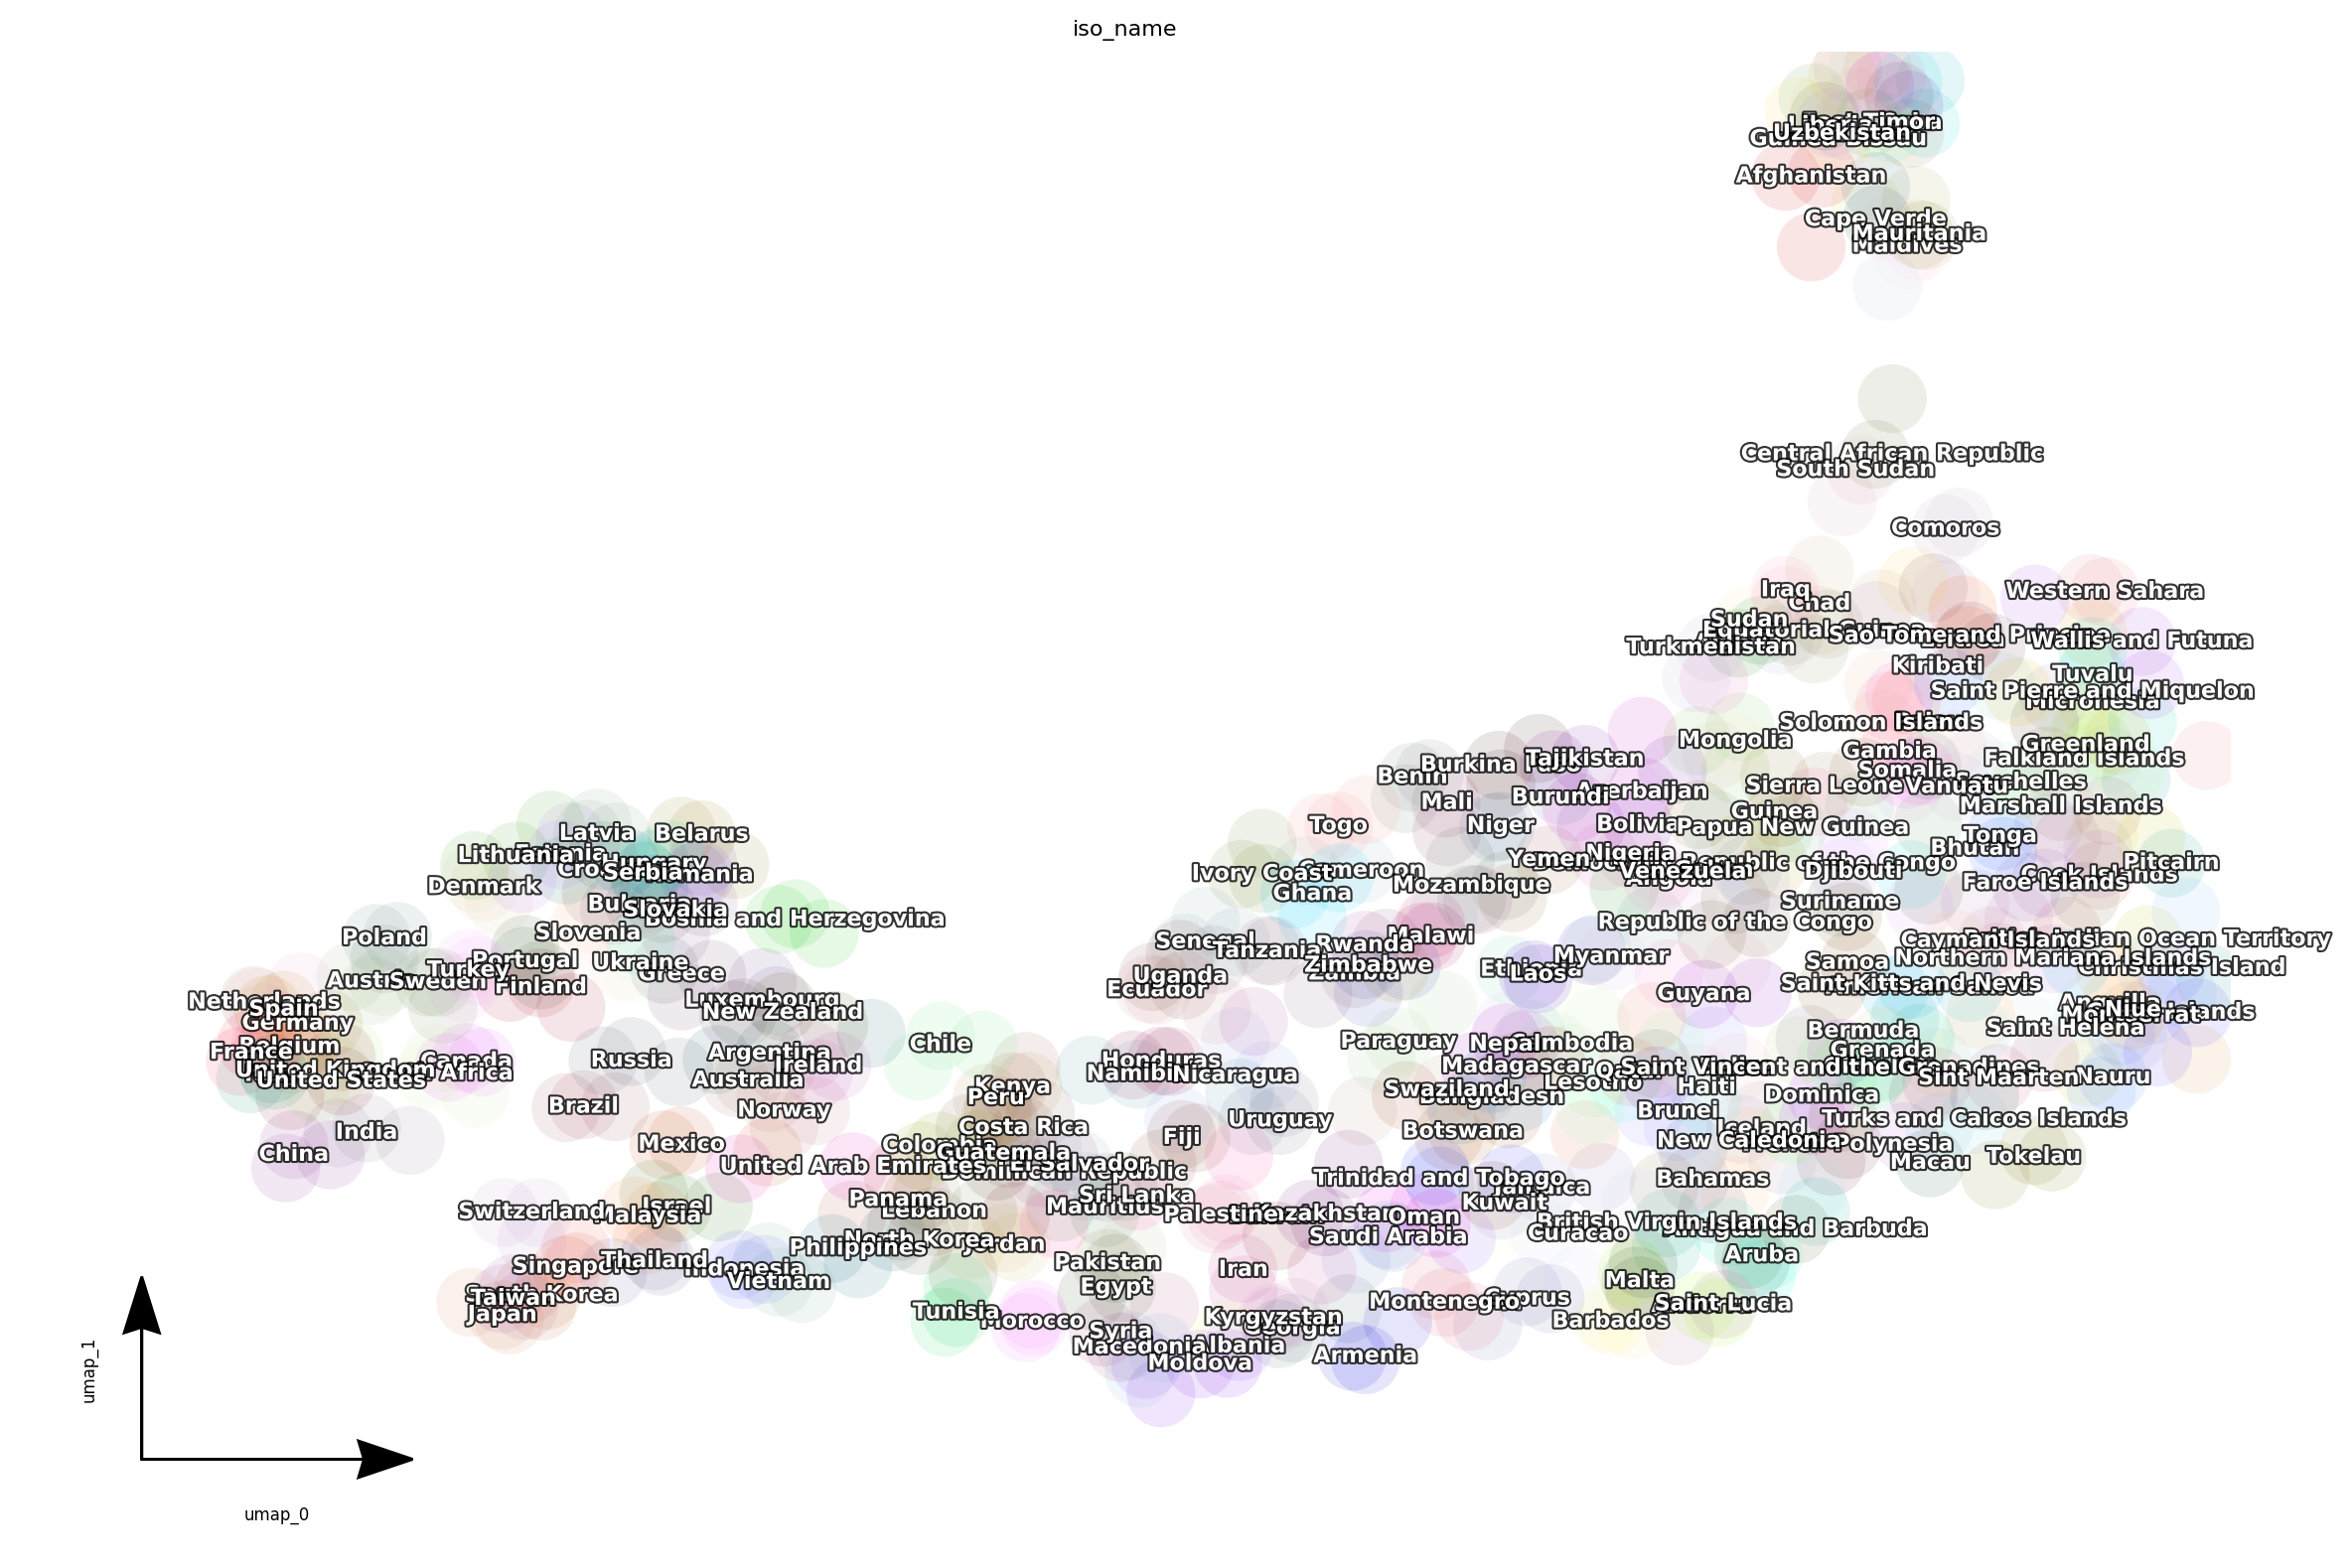

In [62]:
# adata.obs['custom_iso_name'] = adata.obs.apply(lambda x: x['iso_name']+","+str(x['year_at']), axis=1)
mydynamo.dynamoLargePlot(adata,'iso_name')

<Figure size 2400x1600 with 0 Axes>

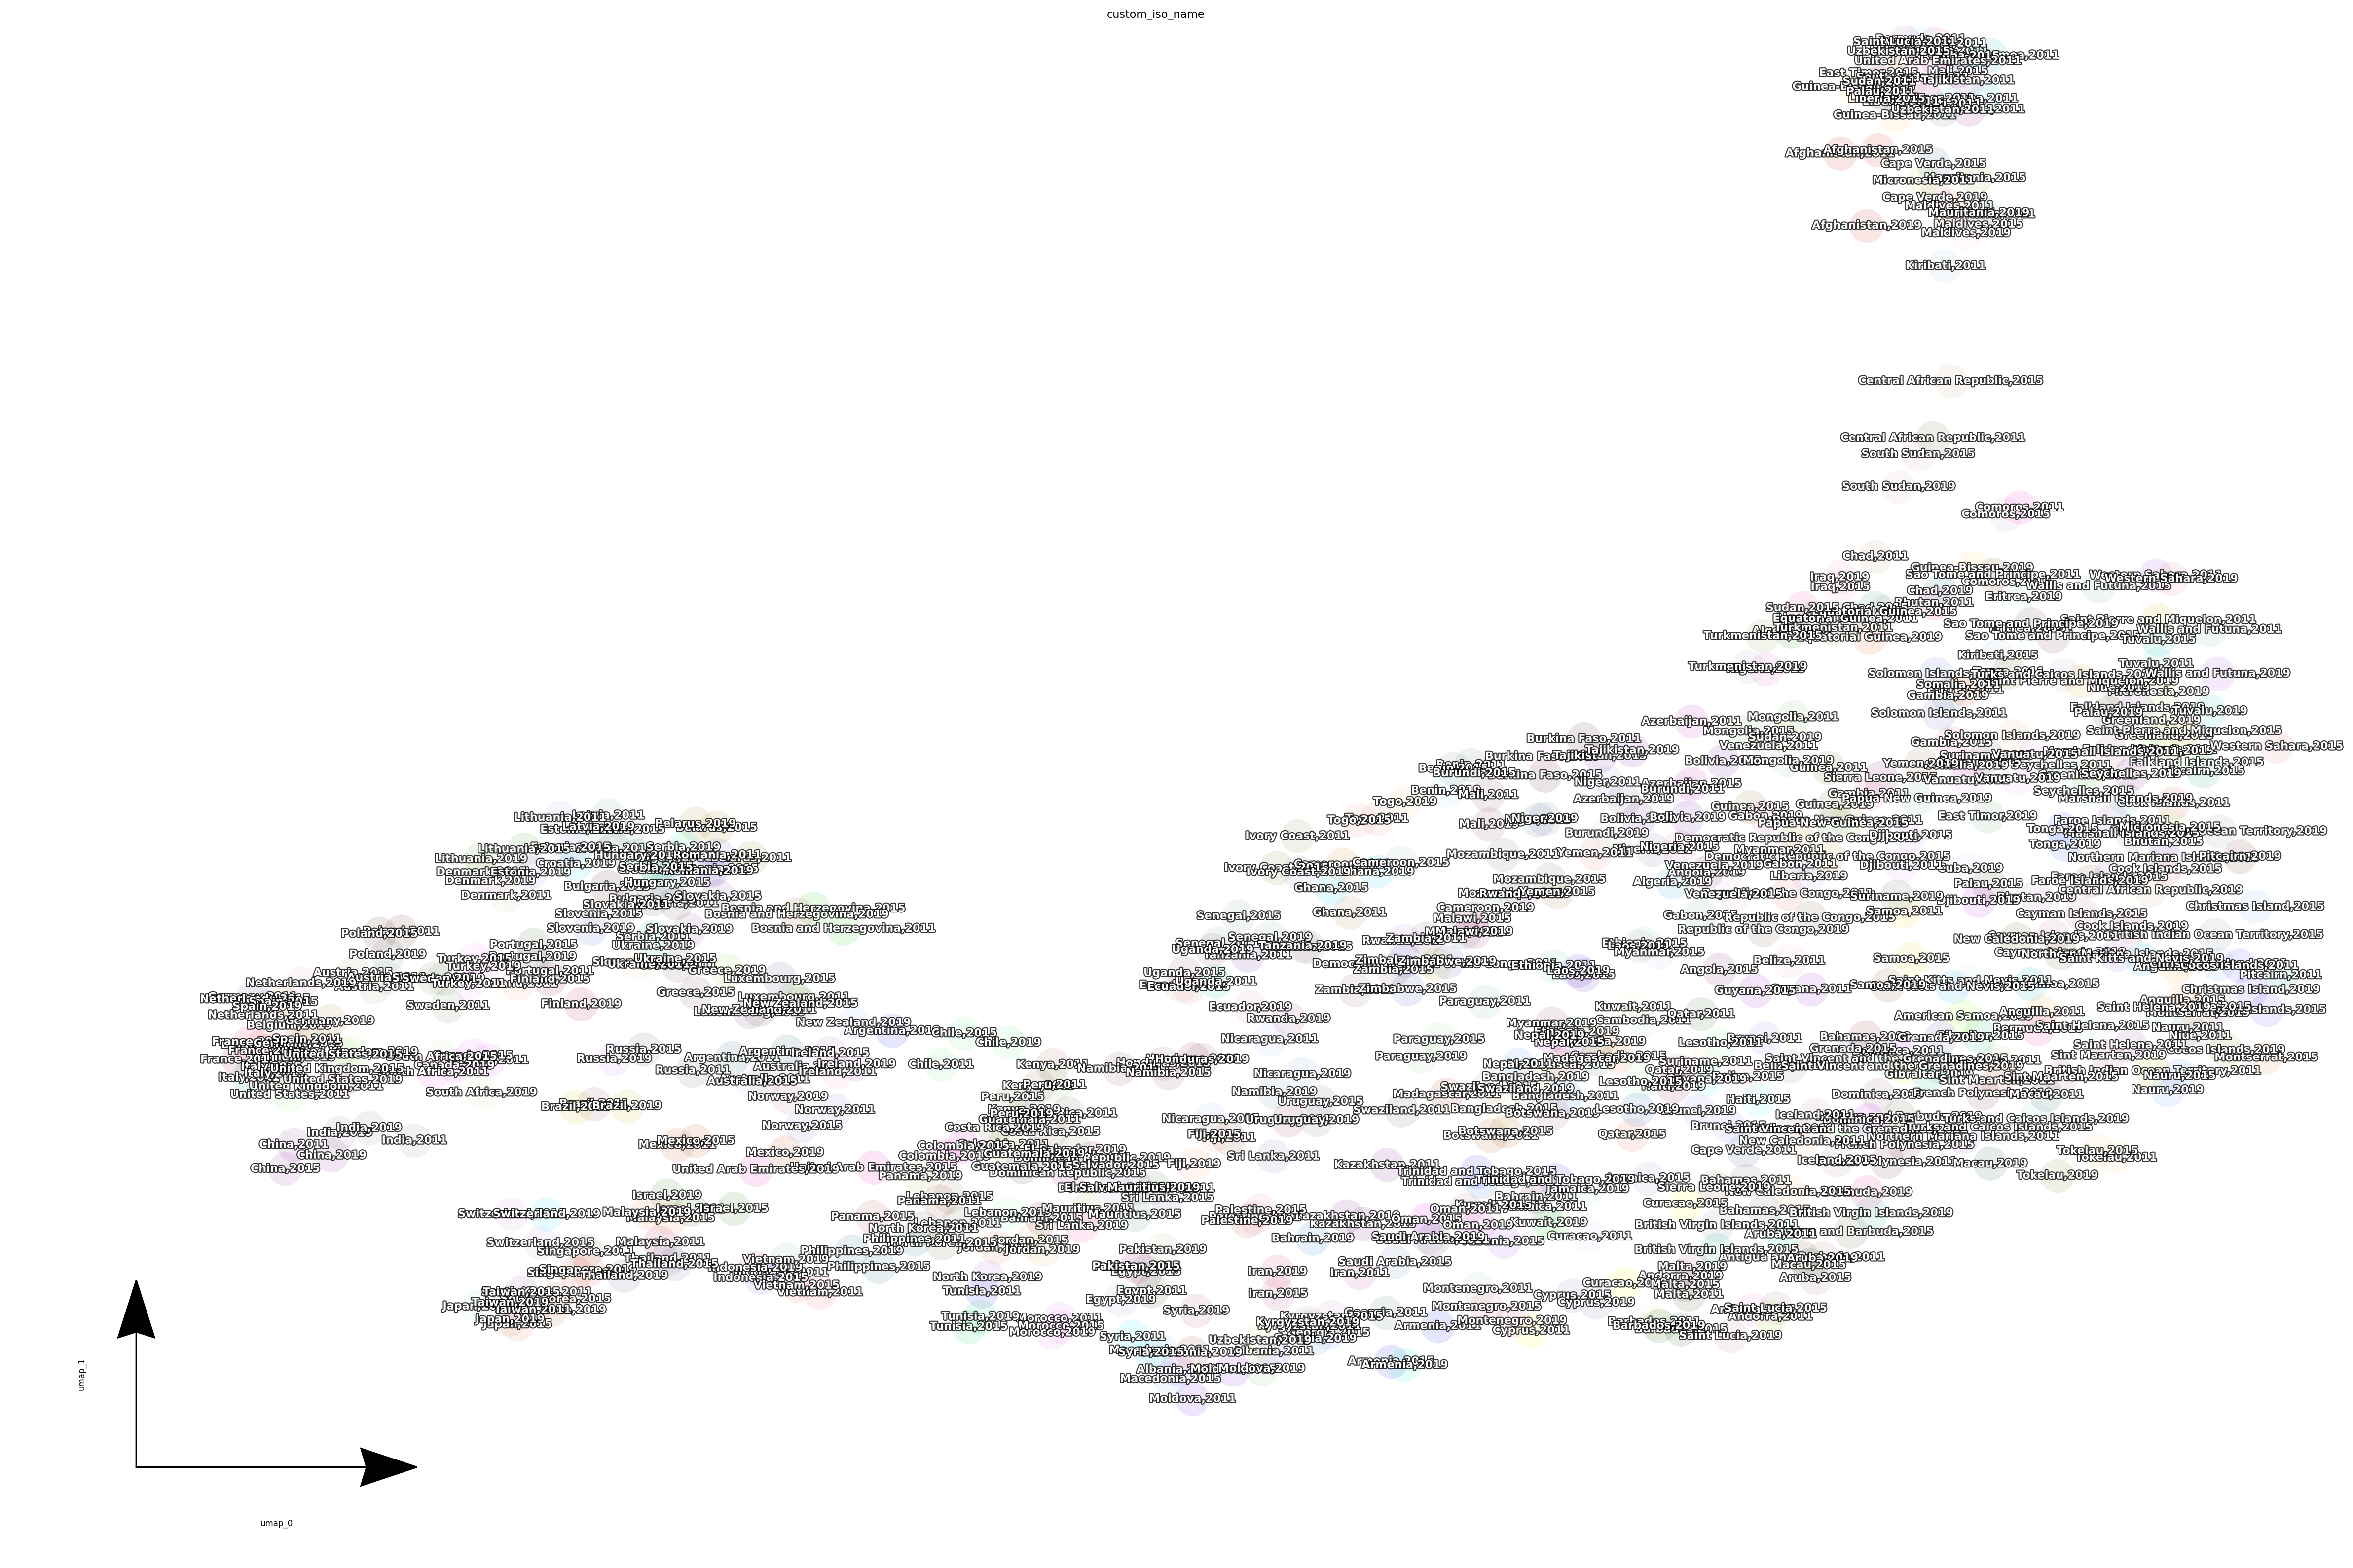

In [63]:
adata.obs['custom_iso_name'] = adata.obs.apply(lambda x: x['iso_name']+","+str(x['year_at']), axis=1)
mydynamo.dynamoVeryLargePlot(adata,'custom_iso_name')